In [1]:
! pip install numpy h5py pandas

In [2]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [13]:
def load_data(filename, mode):
    data = h5.File(filename)
    SP = data[mode + '_System_Parameters']

    if mode == 'BSE': 
        df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()]
        })
            
    else:
        df = pd.DataFrame({
           'L': SP['Luminosity'][()],
           'Teff': SP['Teff'][()],
           'type': SP['Stellar_Type'][()]
        })

    return df

Inspect the data:
Data_SSE  = h5.File('COMPAS_Output_SSE.h5')
list(Data_SSE.keys())

Inspect mergers:
CE_BSE = Data_BSE['BSE_Common_Envelopes']
#list(CE_BSE.keys())
merger = CE_BSE['Merger'][()]
print(merger.shape)     

Print log file keys (e.g. system parameter keys):
list(SP_BSE.keys())

Finding the unit of a parameter:
print(SP_BSE['Teff(1)'].attrs['units'])
print(SP_BSE['Luminosity(1)'].attrs['units'])

In [25]:
binary = load_data('COMPAS_Output.h5', 'BSE')
single = load_data('COMPAS_Output_SSE.h5', 'SSE')

In [26]:
single_MS = restrict(single, 'type', 1, 1) #MS stars only

In [27]:
binary_merger = restrict(restrict(binary, 'type1', 1, 1), 'type2', 15, 15) #merger products only

In [28]:
binary_MS = restrict(restrict(binary, 'type1', 1, 1), 'type2', 1, 1) #MS stars only

HRD (Main sequence)

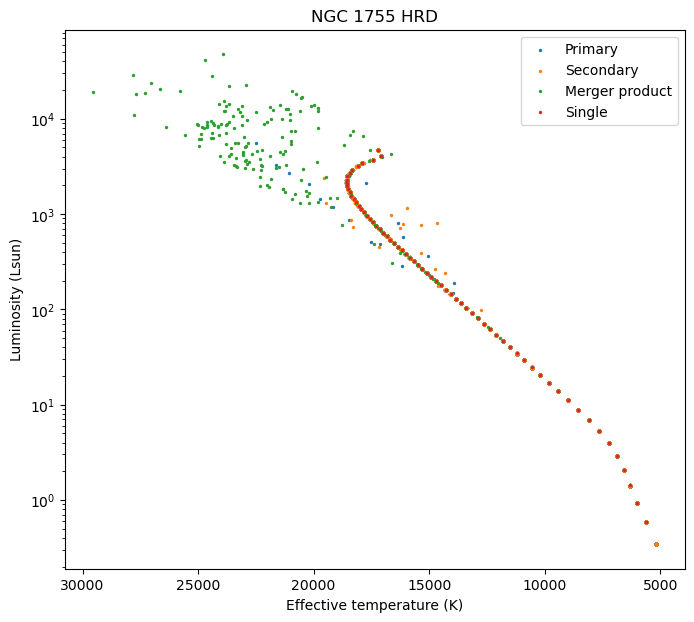

In [41]:
plt.figure(figsize=(8,7))
plt.scatter(binary_MS.Teff1, binary_MS.L1, label = 'Primary', s = 2)
plt.scatter(binary_MS.Teff2, binary_MS.L2, label = 'Secondary', s = 2)
plt.scatter(binary_merger.Teff1, binary_merger.L1, label = 'Merger product', s = 2)
plt.scatter(single_MS.Teff, single_MS.L, label = 'Single', s = 2)
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()